# Download kaggle Data to Colab
if you want to run this script in Google Colab, please run the following code to download and unzip kaggle Datasets.

In [ ]:
# !pip install -q kaggle

# # upload Kaggle API key
# from google.colab import files
# files.upload()

# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# # Change the permissions of the file.
# !chmod 600 ~/.kaggle/kaggle.json

# download dataset from Kaggle
# !kaggle datasets download -d syedabbasraza/suspicious-communication-on-social-platforms
# !unzip suspicious-communication-on-social-platforms.zip -d ./dataset

# Download kaggle Data in Kaggle Notebook

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suspicious-communication-on-social-platforms/Suspicious Communication on Social Platforms.csv


# Import Python Library

In [9]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Functions

In [ ]:
# check HTML tag
html_tag_pattern = re.compile(r'<[^>]+>')

def contains_html(text):
    return bool(html_tag_pattern.search(text))

def remove_html_tags(text):
    # 定義正則表達式
    html_tag_pattern = re.compile(r'<[^>]*>')
    # 用空字串替換所有HTML標籤
    return html_tag_pattern.sub('', text)

# remove space and characters
def rm_space_and_characters(text): 
    cleaned_text = re.sub(r'\s+', ' ', text).strip()  # \s+ 匹配一個或多個空格
    return cleaned_text

# load datasets

In [16]:
comms = pd.read_csv("/kaggle/input/suspicious-communication-on-social-platforms/Suspicious Communication on Social Platforms.csv")
print(comms.shape)
comms.head(2)

(20001, 2)


,comments,tagging
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1


# Data Preprocessing
1. check the null value
2. check the tagging distribution
3. do data preprocessing, like: 
    - maker all word lower case  
    - 移除 HTML 標籤、URL、非語義文字 (如隨機符號)
    - 去除多餘的空格或標點
4. 看 tagging = 1 的資料有什麼特徵

In [7]:
# check the null value
comms[comms['comments'].isnull()].shape

(0, 2)

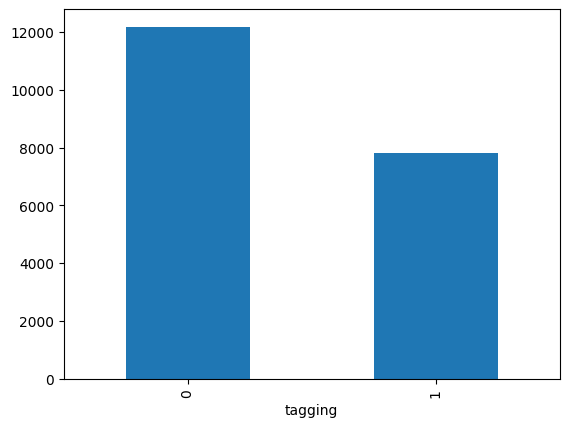

In [8]:
# check the tagging distribution
comms['tagging'].value_counts().plot(kind='bar')
plt.show()

In [10]:
# remove HTML tags
comms['contain_html_comments'] = comms['comments'].apply(lambda s: contains_html(s))
comms['removed_html_comments'] = comms['comments'].apply(lambda s: remove_html_tags(s))

print(f"{sum(comms['contain_html_comments'])} comments contain html tags.")
comms.head(2)

6 comments contain html tags.


,comments,tagging,contain_html_comments,removed_html_comments
0,Get fucking real dude.,1,False,Get fucking real dude.
1,She is as dirty as they come and that crook ...,1,False,She is as dirty as they come and that crook ...


In [11]:
# remove space and characters
comms['cleaned_comments'] = comms['removed_html_comments'].apply(lambda s: rm_space_and_characters(s))

# make all word to lower case
comms['cleaned_comments'] = comms['cleaned_comments'].apply(lambda s: s.lower())
comms['comm_length'] = comms['cleaned_comments'].apply(lambda s: len(s))

comms.head(2)

,comments,tagging,contain_html_comments,removed_html_comments,cleaned_comments,comm_length
0,Get fucking real dude.,1,False,Get fucking real dude.,get fucking real dude.,22
1,She is as dirty as they come and that crook ...,1,False,She is as dirty as they come and that crook ...,she is as dirty as they come and that crook re...,126
